In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rich.jupyter import display
from IPython.display import display
from zmq.backend import first

In [2]:
train_pd = pd.read_csv('data/titanic/train.csv')
test_pd = pd.read_csv('data/titanic/test.csv')

display(train_pd)
display(test_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Preprocessing

survived = train_pd['Survived']
train_pd = train_pd.drop(['Survived'], axis=1)

display(train_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)

display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print("Null Values: ")
print(combined_pd.isnull().sum())

# print(combined_pd.info())

Null Values: 
PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


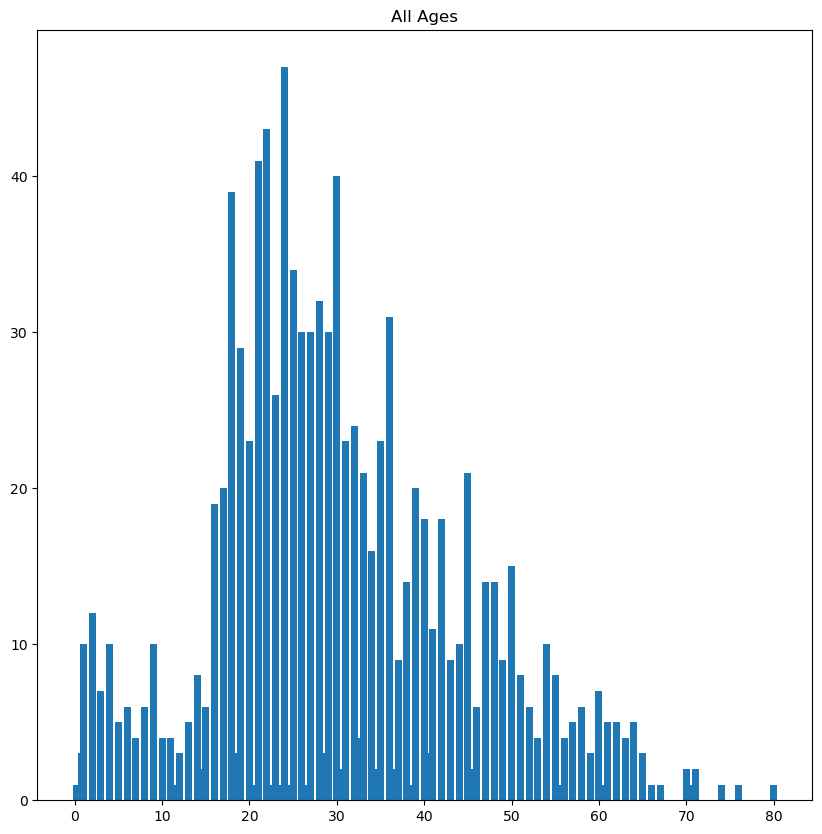

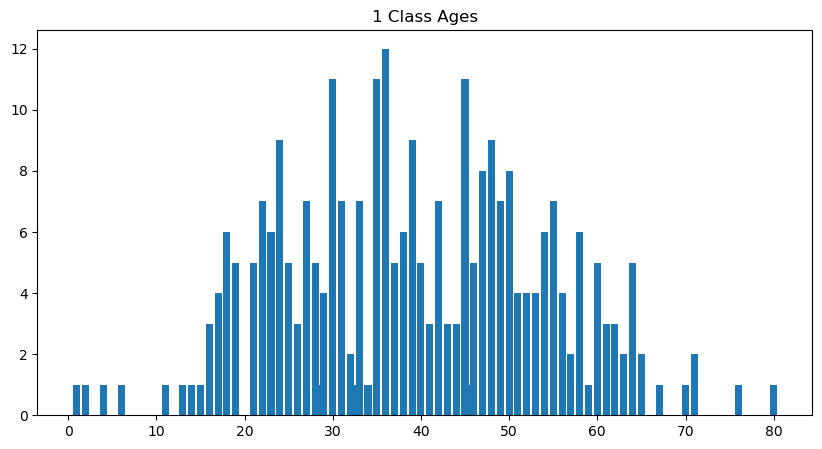

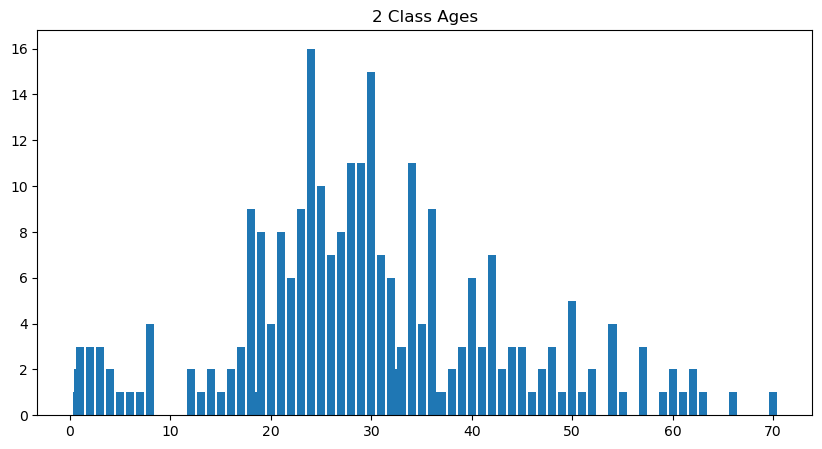

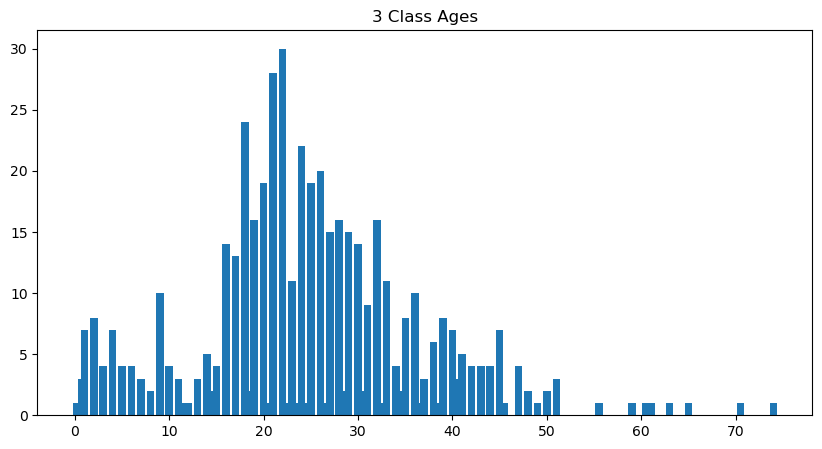

         Age
Pclass      
1       39.0
2       29.0
3       24.0


In [6]:
y = combined_pd['Age'].value_counts()
x = y.index.values

plt.figure(figsize = (10,10))
plt.bar(x, y)
plt.title("All Ages")
plt.show()

class_age = combined_pd[['Pclass', 'Age']]

for i in range(1, 4):
    plt.figure(figsize = (10,5))
    plt.title(f"{i} Class Ages")  #('Class' + str[i])
    y = class_age[class_age['Pclass'] == i]['Age'].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.show()

medians = class_age.groupby('Pclass').median()
print(medians)

In [7]:
# Filling the missing values in each class
for i in range(3):
    idx = np.where((combined_pd['Pclass'] == i+1) & (combined_pd['Age'].isnull()))[0]
    combined_pd.loc[idx, 'Age'] = medians.values[i][0]

display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Median: 8.05


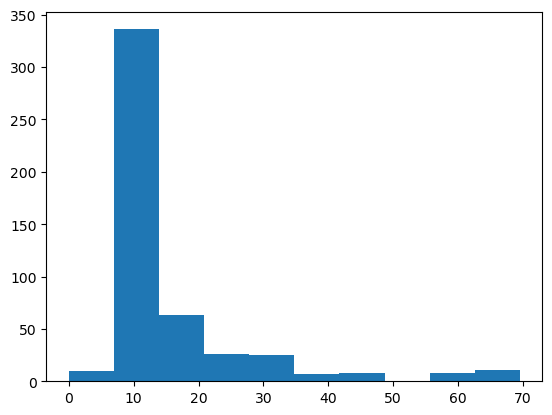

In [8]:
print(combined_pd.info())
display(combined_pd[combined_pd['Fare'].isnull()])

sim_fares = combined_pd[(combined_pd['Pclass'] == 3) & (combined_pd['Embarked'] == 'S')]['Fare']

print('Median:', sim_fares.median())

plt.hist(sim_fares)
plt.plot()

# combined_pd['Fare'].fillna(sim_fares.median(), inplace=True)
combined_pd.fillna({'Fare':sim_fares.median()}, inplace=True)
# combined_pd.loc[:, 'Fare'] = combined_pd['Fare'].fillna(sim_fares.median())

In [9]:
display(combined_pd[combined_pd['Embarked'].isnull()])

sim_emb = combined_pd[(combined_pd['Pclass'] == 1) & (combined_pd['Fare'] >= 70) & (combined_pd['Fare'] >= 90)]['Embarked']

print(sim_emb.value_counts())

# combined_pd['Embarked'].fillna('C', inplace=True)
combined_pd.fillna({'Embarked': 'C'}, inplace=True)
# combined_pd.loc[:, 'Fare'] = combined_pd['Fare'].fillna(sim_fares.median())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked
C    52
S    40
Q     3
Name: count, dtype: int64


In [10]:
# combined_pd['Cabin'].fillna('M', inplace=True)
combined_pd.fillna({'Cabin': 'M'}, inplace=True)

combined_pd['Cabin'] = combined_pd['Cabin'].str[0]

print(combined_pd['Cabin'].value_counts())

idx = np.where(combined_pd['Cabin'] == 'T')[0]
combined_pd.loc[idx, 'Cabin'] = 'M'

Cabin
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64


In [11]:
display(combined_pd)

print(combined_pd.isnull().sum())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
print(combined_pd.nunique())

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin             8
Embarked          3
dtype: int64


In [13]:
print(combined_pd['Name'].unique())

names = combined_pd['Name']

last_names = []
titles = []
first_names = []

for name in names:
    if ', ' not in name:
        last_names.append('')
    else:
        last, name = name.split(', ', 1)
        last_names.append(last)

    if '. ' not in name:
        last_names.append('')
    else:
        title, first = name.split('. ', 1)
        titles.append(title)
        first_names.append(first)

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)

print('\n')
idx = np.where(np.isin(titles, ['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

idx = np.where(np.isin(titles, ['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'

idx = np.where(np.isin(titles, ['Miss', 'Mlle', 'Ms']))
titles[idx] = 'Ms'

idx = np.where(np.isin(titles, ['Mrs', 'Mme']))
titles[idx] = 'Mrs'

print(np.unique(titles, return_counts=True))

combined_pd['Titles'] = titles

display(combined_pd)

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12'), array([  8,   7, 757, 198, 264,  67,   8]))


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr


In [14]:
print(combined_pd['Age'].min(), combined_pd['Age'].max())

bins = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80])

combined_pd['Age_bin'] = pd.cut(combined_pd['Age'], bins)

display(combined_pd)

0.17 80.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Age_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]"


In [15]:
ticket_dict = dict(combined_pd['Ticket'].value_counts())

combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)

In [16]:
display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Age_bin,tkt_count
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1


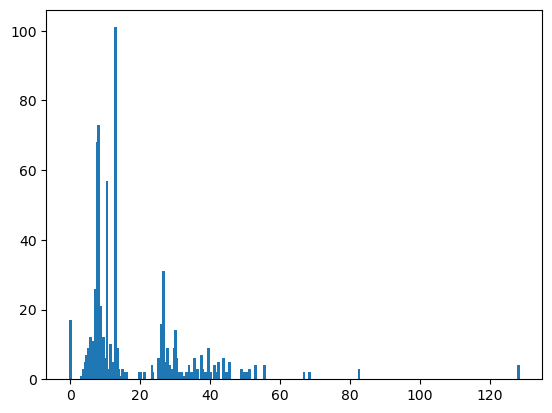

0.17 80.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Age_bin,tkt_count,Fare_per_ticket,Fare_bin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]"
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]"
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]"
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]"
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]"
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]"
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]"


In [17]:
combined_pd['Fare_per_ticket'] = combined_pd['Fare'] / combined_pd['tkt_count']

plt.bar(combined_pd['Fare_per_ticket'].value_counts().index.values, combined_pd['Fare_per_ticket'].value_counts())
plt.show()

print(combined_pd['Age'].min(), combined_pd['Age'].max())

bins = [0, 20 , 40, 60, 80, 150]
combined_pd['Fare_bin'] = pd.cut(combined_pd['Fare_per_ticket'], bins)

display(combined_pd)

In [18]:
combined_pd['Num_family'] = combined_pd['SibSp'] + combined_pd['Parch']+1

display(combined_pd)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles,Age_bin,tkt_count,Fare_per_ticket,Fare_bin,Num_family
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,Mr,"(20, 30]",1,7.250000,"(0, 20]",2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,"(30, 40]",2,35.641650,"(20, 40]",2
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,Ms,"(20, 30]",1,7.925000,"(0, 20]",1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,"(30, 40]",2,26.550000,"(20, 40]",2
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,Mr,"(30, 40]",1,8.050000,"(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Nobility,"(30, 40]",3,36.300000,"(20, 40]",1
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,Mr,"(30, 40]",1,7.250000,"(0, 20]",1
1307,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,M,S,Mr,"(20, 30]",1,8.050000,"(0, 20]",1


In [19]:
combined_pd.drop(['Name', 'Age', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_ticket'], axis=1, inplace=True)

display(combined_pd)

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Titles,Age_bin,Fare_bin,Num_family
0,1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
1,2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
2,3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
3,4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
4,5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1305,1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1306,1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
1307,1308,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1


In [20]:
print(combined_pd.nunique())

PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Parch             8
Cabin             8
Embarked          3
Titles            7
Age_bin           8
Fare_bin          5
Num_family        9
dtype: int64


In [21]:
# Model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [22]:
combined_pd.set_index('PassengerId', inplace=True)
display(combined_pd)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Titles,Age_bin,Fare_bin,Num_family
PassengerId,,,,,,,,,,
1,3,male,1,0,M,S,Mr,"(20, 30]","(0, 20]",2
2,1,female,1,0,C,C,Mrs,"(30, 40]","(20, 40]",2
3,3,female,0,0,M,S,Ms,"(20, 30]","(0, 20]",1
4,1,female,1,0,C,S,Mrs,"(30, 40]","(20, 40]",2
5,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,0,0,M,S,Mr,"(20, 30]","(0, 20]",1
1306,1,female,0,0,C,C,Nobility,"(30, 40]","(20, 40]",1
1307,3,male,0,0,M,S,Mr,"(30, 40]","(0, 20]",1


In [23]:
from sklearn.preprocessing import LabelEncoder

label_enc = combined_pd.copy()
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)

display(label_enc)

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Titles,Age_bin,Fare_bin,Num_family
PassengerId,,,,,,,,,,
1,2,1,1,0,7,2,2,2,0,2
2,0,0,1,0,2,0,3,3,1,2
3,2,0,0,0,7,2,4,2,0,0
4,0,0,1,0,2,2,3,3,1,2
5,2,1,0,0,7,2,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...
1305,2,1,0,0,7,2,2,2,0,0
1306,0,0,0,0,2,0,5,3,1,0
1307,2,1,0,0,7,2,2,3,0,0


In [24]:
one_hot = label_enc.copy()

one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Titles'])
display(one_hot)

,Pclass,SibSp,Parch,Cabin,Age_bin,Fare_bin,Num_family,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Titles_0,Titles_1,Titles_2,Titles_3,Titles_4,Titles_5,Titles_6
PassengerId,,,,,,,,,,,,,,,,,,,
1,2,1,0,7,2,0,2,False,True,False,False,True,False,False,True,False,False,False,False
2,0,1,0,2,3,1,2,True,False,True,False,False,False,False,False,True,False,False,False
3,2,0,0,7,2,0,0,True,False,False,False,True,False,False,False,False,True,False,False
4,0,1,0,2,3,1,2,True,False,False,False,True,False,False,False,True,False,False,False
5,2,0,0,7,3,0,0,False,True,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,2,0,0,7,2,0,0,False,True,False,False,True,False,False,True,False,False,False,False
1306,0,0,0,2,3,1,0,True,False,True,False,False,False,False,False,False,False,True,False
1307,2,0,0,7,3,0,0,False,True,False,False,True,False,False,True,False,False,False,False


In [25]:
X = one_hot.loc[train_idx].values
y = survived.values

scaler = MinMaxScaler()
# X_scale = scaler.fit_transform(X)
scaler.fit(X)
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 19) (179, 19) (712,) (179,)


In [26]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train).score(X_test, y_test)

0.8268156424581006

In [27]:
params = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [20, 50, 100, 200, 300, 400, 500, 800, 1000],
    'max_depth' : np.arange(3, 50),
    'min_samples_split' : np.arange(1, 1000),
    'max_features' : ['sqrt', 'log2'],
    'max_samples' : np.linspace(0.1, 0.9, 5)
    }

rand_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), params, scoring='accuracy', random_state=42, cv=5)

rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, '\n')
print('Training Accuracy:', rand_search.best_score_)

preds = rand_search.predict(X_test)
print('Test Accuracy:', accuracy_score(preds, y_test))

{'n_estimators': 400, 'min_samples_split': np.int64(55), 'max_samples': np.float64(0.9), 'max_features': 'sqrt', 'max_depth': np.int64(11), 'criterion': 'entropy'} 

Training Accuracy: 0.8215798286220821
Test Accuracy: 0.8156424581005587


In [31]:
n_estimators = [
    max(10, rand_params['n_estimators'] - 10),
    rand_params['n_estimators'],
    rand_params['n_estimators'] + 10
]

min_samples_split = [
    max(2, rand_params['min_samples_split'] - 1),
    rand_params['min_samples_split'],
    rand_params['min_samples_split'] + 1
]

max_samples = [
    min(1.0, max(0.1, rand_params['max_samples'] - 0.05)),
    rand_params['max_samples'],
    min(1.0, rand_params['max_samples'] + 0.05)
]

max_depth = [
    None,
    max(1, rand_params['max_depth'] - 5),
    rand_params['max_depth'],
    rand_params['max_depth'] + 5
]

params = {
    'criterion': [rand_params['criterion']],
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'max_features': [rand_params['max_features']],
    'max_samples': max_samples,
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')
print('Training Accuracy:', grid_search.best_score_)

preds = grid_search.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, preds))


{'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_samples': np.float64(0.9500000000000001), 'min_samples_split': np.int64(54), 'n_estimators': 390} 

Training Accuracy: 0.8272136314389836
Test Accuracy: 0.8156424581005587


In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
clf = AdaBoostClassifier()

clf.fit(X_train, y_train).score(X_test, y_test)

0.8100558659217877

In [34]:
params = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 800, 1000],
    'learning_rate': [1.0, 0.1, 0.01, 0.001, 0.0001],
}

rand_search = RandomizedSearchCV(AdaBoostClassifier(random_state=42), params, scoring='accuracy', random_state=42, cv=5)

rand_search.fit(X_train, y_train)

rand_params = rand_search.best_params_
print(rand_params, '\n')
print('Training Accuracy:', rand_search.best_score_)

pred = rand_search.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, preds))

{'n_estimators': 400, 'learning_rate': 1.0} 

Training Accuracy: 0.8314291342460358
Test Accuracy: 0.8156424581005587


In [35]:
n_estimators = np.linspace(rand_params['n_estimators']-50, rand_params['n_estimators']+50, 3).astype(int)

learning_rate = np.linspace(rand_params['learning_rate']*0.9, rand_params['learning_rate']*1.1, 3)

params = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate
}

grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), params, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, '\n')
print('Training Accuracy:', grid_search.best_score_)

prediction = grid_search.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, preds))

{'learning_rate': np.float64(0.9), 'n_estimators': np.int64(350)} 

Training Accuracy: 0.8342361863488625
Test Accuracy: 0.8156424581005587
